In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.graph import graph_shortest_path
from scipy.spatial import distance_matrix

In [17]:
swiss_df = []
with open('swiss_roll.txt','r') as file:
    for line in file.readlines():
        swiss_df.append([float(x) for x in line.split()])
swiss_df = np.array(swiss_df)

In [18]:
swiss_hole_df = []
with open('swiss_roll_hole.txt','r') as file:
    for i in file.readlines():
        swiss_hole_df.append([float(x) for x in i.split()])
swiss_hole_df = np.array(swiss_hole_df)

In [19]:
n_nhbrs = 6
learn_rate = 0.0001
n_components = 2

In [20]:
def knn(data,n_nbhrs=6):
    
    # first construct full distance matrix, default is 2-norm
    d = distance_matrix(data,data)
    
    # now we are making a num_neighbors-nearest-neighbor "graph"
    nn = np.zeros_like(d)
    sort_distance = np.argsort(d, axis=1)[:, 1:n_nhbrs+1]

    for i in range(sort_distance.shape[0]):
        for j in sort_distance[i]:
            nn[i,j] = d[i,j]

    return nn

In [24]:
def isomap(data, k=n_nhbrs, alpha=learn_rate, dim = n_components):
    
    nn = knn(data,k)
    graph = graph_shortest_path(nn, directed=False)
    y = np.random.rand(data.shape[0], dim)
    
    for i in range(200):
        y -= alpha*gradient(y,graph)
        
    return y

In [25]:
def gradient(y, graph):
    z = np.tile(y, (y.shape[0], 1,1))
    y_delta = np.swapaxes(z, 0, 1) - z
    norm = np.linalg.norm(y_delta, axis=2)
    M = np.ones_like(graph) - np.divide(graph,norm, out=np.zeros_like(graph), where=norm!=0)
    out = np.zeros(y.shape)
    for i in range(y.shape[0]):
        out[i] = np.matmul(M[i], y_delta[i])
        
    return out

In [26]:
sr_embed = isomap(swiss_df, n_nhbrs, learn_rate, n_components)

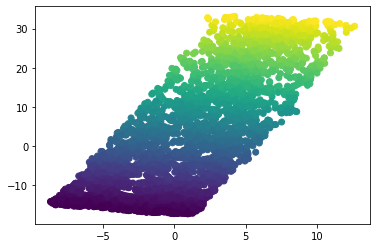

In [27]:
plt.figure()
plt.scatter(sr_embed[:,0],sr_embed[:,1],c=swiss_df[:,0]**2+swiss_df[:,1]**2, cmap = plt.cm.viridis)
plt.savefig('2d_embedding.png')

In [28]:
sr_embed_hole = isomap(swiss_hole_df, n_nhbrs, learn_rate, n_components)

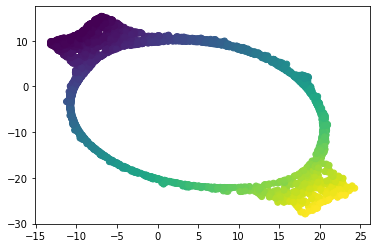

In [29]:
plt.figure()
plt.scatter(sr_embed_hole[:,0],sr_embed_hole[:,1],c=swiss_hole_df[:,0]**2+swiss_hole_df[:,1]**2, cmap = plt.cm.viridis)
plt.savefig('2d_embedding_hole.png')